# Data Science Challenge<a href="#Data-Science-Challenge" class="anchor-link">¶</a>

In \[ \]:

    # To install packages that are not installed by default, uncomment the last two lines 
    # of this cell and replace <package list> with a list of necessary packages.
    # This will ensure the notebook has all the dependencies and works everywhere.

    #import sys
    #!{sys.executable} -m pip install <package list>

In \[1\]:

    #Libraries
    import pandas as pd
    import numpy as np


    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    import lightgbm as lgb

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold


    import seaborn as sns
    import matplotlib.pyplot as plt

    pd.set_option("display.max_columns", 101)

## Data Description<a href="#Data-Description" class="anchor-link">¶</a>

| Column                | Description                                                                                                                                               |
|:----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|
| `id`                  | The unique ID assigned to every hotel.                                                                                                                    |
| `region`              | The region in which the hotel is located..                                                                                                                |
| `latitude`            | The latitude of the hotel.                                                                                                                                |
| `longitude`           | The longitude of the hotel.                                                                                                                               |
| `accommodation_type`  | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.                                                         |
| `cost`                | The cost of booking the hotel for one night. (in \\\$\\\$)                                                                                                |
| `minimum_nights`      | The minimum number of nights stay required.                                                                                                               |
| `number_of_reviews`   | The number of reviews accumulated by the hotel.                                                                                                           |
| `reviews_per_month`   | The average number of reviews received by the hotel per month.                                                                                            |
| `owner_id`            | The unique ID assigned to every owner. An owner can own multiple hotels.                                                                                  |
| `owned_hotels`        | The number of hotels owned by the owner.                                                                                                                  |
| `yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year). |

## Data Wrangling & Visualization<a href="#Data-Wrangling-&amp;-Visualization" class="anchor-link">¶</a>

In \[2\]:

    # Dataset is already loaded below
    data = pd.read_csv("train.csv")

In \[3\]:

    data.head()

Out\[3\]:

|     | id    | region    | latitude | longitude | accommodation_type | cost | minimum_nights | number_of_reviews | reviews_per_month | owner_id  | owned_hotels | yearly_availability |
|-----|-------|-----------|----------|-----------|--------------------|------|----------------|-------------------|-------------------|-----------|--------------|---------------------|
| 0   | 13232 | Manhattan | 40.71854 | -74.00439 | Entire home/apt    | 170  | 5              | 7                 | 0.56              | 929983    | 1            | 0                   |
| 1   | 246   | Brooklyn  | 40.64446 | -73.95030 | Entire home/apt    | 65   | 3              | 238               | 2.30              | 281764    | 1            | 0                   |
| 2   | 19091 | Queens    | 40.78573 | -73.81062 | Private room       | 85   | 1              | 0                 | NaN               | 19923341  | 1            | 1                   |
| 3   | 34305 | Manhattan | 40.73863 | -73.98002 | Private room       | 210  | 30             | 0                 | NaN               | 200380610 | 65           | 1                   |
| 4   | 444   | Manhattan | 40.82426 | -73.94630 | Shared room        | 75   | 3              | 38                | 0.42              | 745069    | 3            | 1                   |

In \[4\]:

    #Explore columns
    data.columns

Out\[4\]:

    Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
           'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
           'owned_hotels', 'yearly_availability'],
          dtype='object')

In \[5\]:

    #Description
    data.describe()

Out\[5\]:

|       | id           | latitude    | longitude   | cost        | minimum_nights | number_of_reviews | reviews_per_month | owner_id     | owned_hotels | yearly_availability |
|-------|--------------|-------------|-------------|-------------|----------------|-------------------|-------------------|--------------|--------------|---------------------|
| count | 2870.000000  | 2870.000000 | 2870.000000 | 2870.000000 | 2870.000000    | 2870.000000       | 2194.000000       | 2.870000e+03 | 2870.000000  | 2870.000000         |
| mean  | 26760.657143 | 40.731224   | -73.950158  | 195.943206  | 11.530314      | 16.315331         | 1.157502          | 7.202195e+07 | 8.411498     | 0.498606            |
| std   | 14140.930062 | 0.054942    | 0.049745    | 406.184714  | 37.972339      | 32.481722         | 1.355028          | 8.076516e+07 | 27.105522    | 0.500085            |
| min   | 0.000000     | 40.507080   | -74.242850  | 10.000000   | 1.000000       | 0.000000          | 0.010000          | 2.787000e+03 | 1.000000     | 0.000000            |
| 25%   | 15931.750000 | 40.692462   | -73.984003  | 75.000000   | 1.000000       | 1.000000          | 0.240000          | 7.388002e+06 | 1.000000     | 0.000000            |
| 50%   | 28946.500000 | 40.728250   | -73.956720  | 120.000000  | 3.000000       | 4.000000          | 0.650000          | 3.352708e+07 | 1.000000     | 0.000000            |
| 75%   | 38478.500000 | 40.762658   | -73.934202  | 200.000000  | 6.000000       | 16.000000         | 1.530000          | 1.207625e+08 | 3.000000     | 1.000000            |
| max   | 48893.000000 | 40.898730   | -73.721730  | 9999.000000 | 999.000000     | 395.000000        | 10.370000         | 2.738123e+08 | 327.000000   | 1.000000            |

In \[6\]:

    # Checking data types for each column
    data.dtypes

Out\[6\]:

    id                       int64
    region                  object
    latitude               float64
    longitude              float64
    accommodation_type      object
    cost                     int64
    minimum_nights           int64
    number_of_reviews        int64
    reviews_per_month      float64
    owner_id                 int64
    owned_hotels             int64
    yearly_availability      int64
    dtype: object

In \[7\]:

    # Checking if any column have nulls
    data.isnull().sum(axis=0)

Out\[7\]:

    id                       0
    region                   0
    latitude                 0
    longitude                0
    accommodation_type       0
    cost                     0
    minimum_nights           0
    number_of_reviews        0
    reviews_per_month      676
    owner_id                 0
    owned_hotels             0
    yearly_availability      0
    dtype: int64

In \[8\]:

    # replacing null values with 0's

    data.reviews_per_month = data.reviews_per_month.fillna(0)

In \[9\]:

    # encoding categorical variables
    data  = pd.get_dummies(data, drop_first =True)
    data

Out\[9\]:

|      | id    | latitude | longitude | cost | minimum_nights | number_of_reviews | reviews_per_month | owner_id  | owned_hotels | yearly_availability | region_Brooklyn | region_Manhattan | region_Queens | region_Staten Island | accommodation_type_Private room | accommodation_type_Shared room |
|------|-------|----------|-----------|------|----------------|-------------------|-------------------|-----------|--------------|---------------------|-----------------|------------------|---------------|----------------------|---------------------------------|--------------------------------|
| 0    | 13232 | 40.71854 | -74.00439 | 170  | 5              | 7                 | 0.56              | 929983    | 1            | 0                   | 0               | 1                | 0             | 0                    | 0                               | 0                              |
| 1    | 246   | 40.64446 | -73.95030 | 65   | 3              | 238               | 2.30              | 281764    | 1            | 0                   | 1               | 0                | 0             | 0                    | 0                               | 0                              |
| 2    | 19091 | 40.78573 | -73.81062 | 85   | 1              | 0                 | 0.00              | 19923341  | 1            | 1                   | 0               | 0                | 1             | 0                    | 1                               | 0                              |
| 3    | 34305 | 40.73863 | -73.98002 | 210  | 30             | 0                 | 0.00              | 200380610 | 65           | 1                   | 0               | 1                | 0             | 0                    | 1                               | 0                              |
| 4    | 444   | 40.82426 | -73.94630 | 75   | 3              | 38                | 0.42              | 745069    | 3            | 1                   | 0               | 1                | 0             | 0                    | 0                               | 1                              |
| ...  | ...   | ...      | ...       | ...  | ...            | ...               | ...               | ...       | ...          | ...                 | ...             | ...              | ...           | ...                  | ...                             | ...                            |
| 2865 | 47852 | 40.74316 | -73.98038 | 400  | 2              | 0                 | 0.00              | 270096906 | 1            | 1                   | 0               | 1                | 0             | 0                    | 1                               | 0                              |
| 2866 | 21978 | 40.73523 | -73.99465 | 180  | 3              | 2                 | 0.07              | 97266110  | 1            | 1                   | 0               | 1                | 0             | 0                    | 1                               | 0                              |
| 2867 | 23485 | 40.76619 | -73.98987 | 179  | 3              | 17                | 0.67              | 10903067  | 1            | 0                   | 0               | 1                | 0             | 0                    | 0                               | 0                              |
| 2868 | 16757 | 40.74637 | -73.97207 | 200  | 30             | 0                 | 0.00              | 2856748   | 49           | 1                   | 0               | 1                | 0             | 0                    | 1                               | 0                              |
| 2869 | 2355  | 40.79208 | -73.96482 | 1000 | 30             | 24                | 0.33              | 836168    | 11           | 1                   | 0               | 1                | 0             | 0                    | 0                               | 1                              |

2870 rows × 16 columns

In \[10\]:

    # dropping irrelevant columns - not usefull for model training
    train_data = data.drop(['id','latitude','longitude','owner_id'], axis = 1)

## Visualization, Modeling, Machine Learning<a href="#Visualization,-Modeling,-Machine-Learning" class="anchor-link">¶</a>

Build a model that categorizes hotels on the basis of their yearly
availability. Identify how different features influence the decision.
Please explain the findings effectively to technical and non-technical
audiences using comments and visualizations, if appropriate.

-   **Build an optimized model that effectively solves the business
    problem.**
-   **The model will be evaluated on the basis of Accuracy.**
-   **Read the test.csv file and prepare features for testing.**

In \[11\]:

    #Loading Test data
    test_data=pd.read_csv('test.csv')
    test_data.head()

Out\[11\]:

|     | id    | region    | latitude | longitude | accommodation_type | cost | minimum_nights | number_of_reviews | reviews_per_month | owner_id  | owned_hotels |
|-----|-------|-----------|----------|-----------|--------------------|------|----------------|-------------------|-------------------|-----------|--------------|
| 0   | 19215 | Brooklyn  | 40.70912 | -73.94513 | Shared room        | 135  | 2              | 22                | 0.66              | 4360212   | 1            |
| 1   | 36301 | Brooklyn  | 40.57646 | -73.96641 | Entire home/apt    | 69   | 2              | 8                 | 0.90              | 181356989 | 2            |
| 2   | 40566 | Manhattan | 40.76616 | -73.98228 | Private room       | 225  | 30             | 0                 | NaN               | 13773574  | 12           |
| 3   | 33694 | Manhattan | 40.77668 | -73.94587 | Shared room        | 125  | 30             | 9                 | 0.82              | 6788748   | 1            |
| 4   | 28873 | Manhattan | 40.80279 | -73.94450 | Entire home/apt    | 43   | 1              | 13                | 0.72              | 105061915 | 2            |

## Transforming and cleaning test data<a href="#Transforming-and-cleaning-test-data" class="anchor-link">¶</a>

In \[17\]:

    test_data.isnull().sum(axis=0)

Out\[17\]:

    id                                 0
    latitude                           0
    longitude                          0
    cost                               0
    minimum_nights                     0
    number_of_reviews                  0
    reviews_per_month                  0
    owner_id                           0
    owned_hotels                       0
    region_Brooklyn                    0
    region_Manhattan                   0
    region_Queens                      0
    region_Staten Island               0
    accommodation_type_Private room    0
    accommodation_type_Shared room     0
    dtype: int64

In \[13\]:

    test_data.reviews_per_month = test_data.reviews_per_month.fillna(0)
    test_data  = pd.get_dummies(test_data, drop_first =True)
    test_data_feature = test_data.drop(['id','latitude','longitude','owner_id'], axis = 1)
    test_data_feature

## Checking Correlation between features<a href="#Checking-Correlation-between-features" class="anchor-link">¶</a>

In \[18\]:

    import seaborn as sns
    import matplotlib.pyplot as plt
    corr_df = train_data.corr()
    corr_df

Out\[18\]:

|                                 | cost      | minimum_nights | number_of_reviews | reviews_per_month | owned_hotels | yearly_availability | region_Brooklyn | region_Manhattan | region_Queens | region_Staten Island | accommodation_type_Private room | accommodation_type_Shared room |
|---------------------------------|-----------|----------------|-------------------|-------------------|--------------|---------------------|-----------------|------------------|---------------|----------------------|---------------------------------|--------------------------------|
| cost                            | 1.000000  | 0.052918       | -0.074432         | -0.123086         | 0.032185     | 0.147576            | -0.084543       | 0.141398         | -0.066359     | 0.003322             | 0.126273                        | -0.020195                      |
| minimum_nights                  | 0.052918  | 1.000000       | -0.088767         | -0.139803         | 0.107893     | 0.173550            | -0.045813       | 0.071547         | -0.026489     | -0.006379            | 0.166778                        | -0.049767                      |
| number_of_reviews               | -0.074432 | -0.088767      | 1.000000          | 0.576553          | -0.112328    | -0.191645           | 0.053843        | -0.032103        | -0.026691     | -0.028090            | -0.177441                       | -0.082181                      |
| reviews_per_month               | -0.123086 | -0.139803      | 0.576553          | 1.000000          | -0.147011    | -0.312213           | 0.021694        | -0.042358        | 0.022218      | -0.007715            | -0.300600                       | -0.010960                      |
| owned_hotels                    | 0.032185  | 0.107893       | -0.112328         | -0.147011         | 1.000000     | 0.191906            | -0.156839       | 0.209776         | -0.064695     | -0.017487            | 0.138570                        | -0.048646                      |
| yearly_availability             | 0.147576  | 0.173550       | -0.191645         | -0.312213         | 0.191906     | 1.000000            | -0.079190       | -0.019062        | 0.094650      | 0.050205             | 0.690654                        | -0.081234                      |
| region_Brooklyn                 | -0.084543 | -0.045813      | 0.053843          | 0.021694          | -0.156839    | -0.079190           | 1.000000        | -0.720693        | -0.297716     | -0.054182            | -0.092917                       | 0.029619                       |
| region_Manhattan                | 0.141398  | 0.071547       | -0.032103         | -0.042358         | 0.209776     | -0.019062           | -0.720693       | 1.000000         | -0.358269     | -0.065202            | 0.031126                        | -0.024543                      |
| region_Queens                   | -0.066359 | -0.026489      | -0.026691         | 0.022218          | -0.064695    | 0.094650            | -0.297716       | -0.358269        | 1.000000      | -0.026935            | 0.048503                        | 0.015223                       |
| region_Staten Island            | 0.003322  | -0.006379      | -0.028090         | -0.007715         | -0.017487    | 0.050205            | -0.054182       | -0.065202        | -0.026935     | 1.000000             | 0.050801                        | -0.025627                      |
| accommodation_type_Private room | 0.126273  | 0.166778       | -0.177441         | -0.300600         | 0.138570     | 0.690654            | -0.092917       | 0.031126         | 0.048503      | 0.050801             | 1.000000                        | -0.463693                      |
| accommodation_type_Shared room  | -0.020195 | -0.049767      | -0.082181         | -0.010960         | -0.048646    | -0.081234           | 0.029619        | -0.024543        | 0.015223      | -0.025627            | -0.463693                       | 1.000000                       |

In \[53\]:

    plt.figure(figsize=(10,8))
    sns.heatmap(data.corr(),annot=True)

Out\[53\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7fb230edd290>

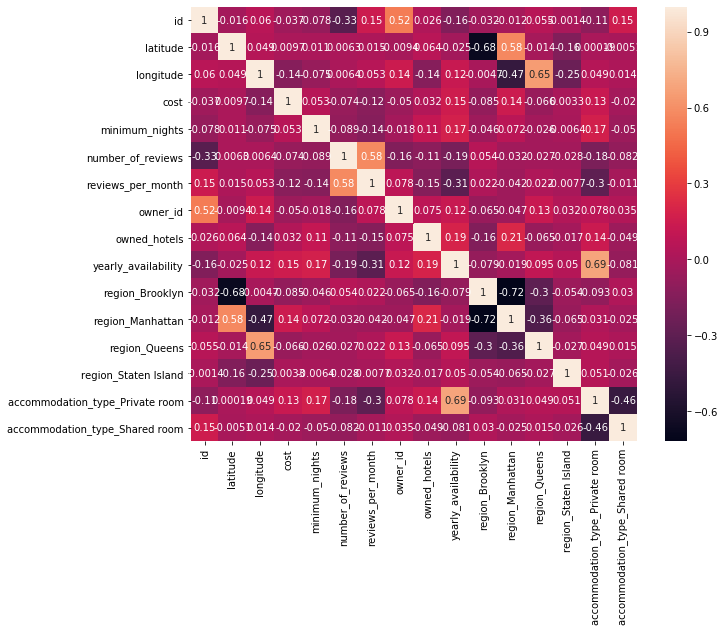

No significant correlation is observed among the given features

In \[55\]:

    data_viz = pd.read_csv("train.csv")

## Data Visualizations<a href="#Data-Visualizations" class="anchor-link">¶</a>

In \[56\]:

    plt.figure(figsize=(10,5))
    sns.countplot(x='accommodation_type', data=data_viz)
    plt.show()

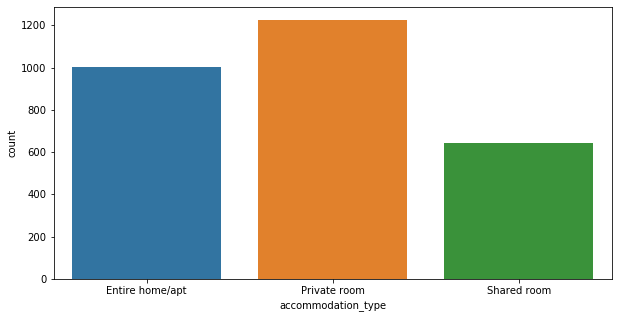

From the dataset, it's observed that private room accomadation type are
highest number of records followed by home/apt and shared room.

In \[57\]:

    plt.figure(figsize=(10,5))
    sns.countplot(x='accommodation_type', hue='region', data=data_viz)
    plt.show()

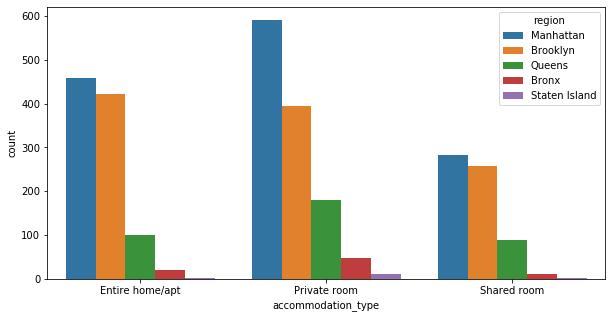

The above vizualization depitcs Number of hotels among given regions for
all accomodation types. It can be inferred that Manhattan has highest
no.of hotels for all accomodation among all the regions.

In \[59\]:

    df1=data_viz[['accommodation_type','yearly_availability']].groupby('accommodation_type').sum()
    df2=data_viz[['accommodation_type','yearly_availability']].groupby('accommodation_type').count().rename(columns={'yearly_availability':'total'})
    result1 = pd.concat([df1, df2], axis=1)
    result1['No_yearly_availability']=result1['total']-result1['yearly_availability']
    result1.reset_index()
    result1['yearly_availability']=result1['yearly_availability']/result1['total']*100
    result1['No_yearly_availability']=result1['No_yearly_availability']/result1['total']*100
    result1[['yearly_availability','No_yearly_availability']].reset_index()

Out\[59\]:

|     | accommodation_type | yearly_availability | No_yearly_availability |
|-----|--------------------|---------------------|------------------------|
| 0   | Entire home/apt    | 5.788423            | 94.211577              |
| 1   | Private room       | 89.877551           | 10.122449              |
| 2   | Shared room        | 42.301711           | 57.698289              |

The above table shows availabilty and non-availability percentages of
all hotels by accomodation type. It can be inferred that private rooms
are available the most and entire home/apt are available the least.

In \[60\]:

    df3=data_viz[['region','yearly_availability']].groupby('region').sum()
    df4=data_viz[['region','yearly_availability']].groupby('region').count().rename(columns={'yearly_availability':'total'})
    result = pd.concat([df3, df4], axis=1)
    result['No_yearly_availability']=result['total']-result['yearly_availability']
    result.reset_index()
    result['yearly_availability']=result['yearly_availability']/result['total']*100
    result['No_yearly_availability']=result['No_yearly_availability']/result['total']*100
    result[['yearly_availability','No_yearly_availability']].reset_index()

Out\[60\]:

|     | region        | yearly_availability | No_yearly_availability |
|-----|---------------|---------------------|------------------------|
| 0   | Bronx         | 73.076923           | 26.923077              |
| 1   | Brooklyn      | 44.744186           | 55.255814              |
| 2   | Manhattan     | 48.837209           | 51.162791              |
| 3   | Queens        | 62.162162           | 37.837838              |
| 4   | Staten Island | 85.714286           | 14.285714              |

The above table shows availabilty and non-availability percentages of
all hotels by region. It can be inferred that hotels in Staten Island
and bronx are highly available when compared to brookyn and manhattan.

In \[61\]:

    def feature_interactions(df,feature1, feature2,continuous_col):
        group = df.groupby([feature1,feature2],as_index=False)[continuous_col].mean().reset_index(drop=True)
        pivot = group.pivot(index=feature1, columns=feature2, values=continuous_col)
        pivot.fillna(0, inplace=True)
        plt.figure(figsize=(10,6))
        sns.heatmap(pivot,cmap='Reds')
        plt.show()

    feature_interactions(data_viz,'accommodation_type','region','cost')

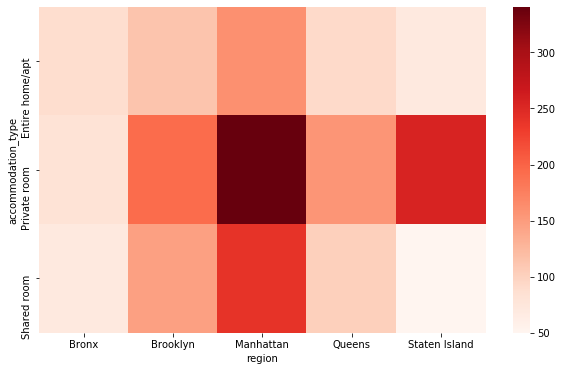

In \[62\]:

    plt.figure(figsize=(10,5))
    plt.ylim(0,600)
    sns.boxplot(x='region', y='cost',data=data_viz)
    plt.show()

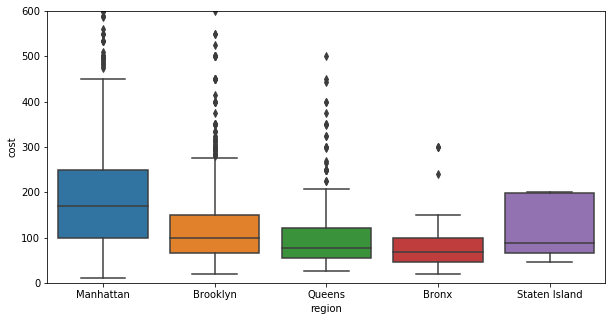

The above heatmap and boxplot represents the varaiation of hotel costs
per day for the regions am=nd accomodation type. it can be observed that
all types of accomdation in manhatten are the costliest and private room
the most.

In \[63\]:

    sns.swarmplot(x='yearly_availability', y='cost', data=data_viz)

Out\[63\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7fb1d43ef8d0>

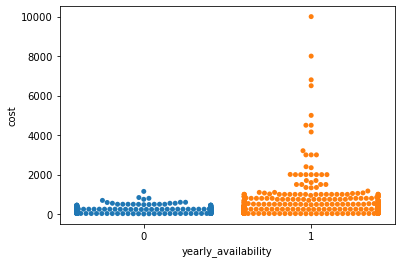

In \[107\]:

    sns.swarmplot(x='yearly_availability', y='number_of_reviews', data=data_viz)

Out\[107\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7fb1d4c23650>

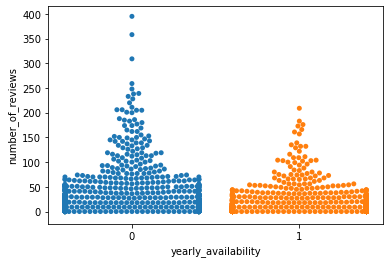

Hotels with more number of reviews, tends to be unavailable which means
managment should encourage their customers to provide reviews

The above Graph shows us that the accomodation type, minimum nights a
person stays, cost and region are positively correlated whereas features
like number_of_reviews, reviews_per_month are negatively correlated,
i.e. if these numbers are more, yearly availability is less probable to
be 1.

In \[109\]:

    # Checking distribution of yearly_availability column in the training data
    f, ax = plt.subplots(figsize=(7, 5))
    sns.countplot(x='yearly_availability', data=train_data)
    plt.title('# Availability vs Non Availability')
    plt.xlabel('Class (1==Availability)')

Out\[109\]:

    Text(0.5, 0, 'Class (1==Availability)')

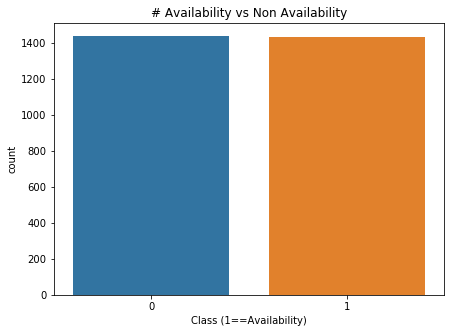

Since there are comparable number of records for both the classes, we
can use the accuracy metrics for performance.

# Model Building<a href="#Model-Building" class="anchor-link">¶</a>

In \[27\]:

    # Splitting data to train and test
    np.random.seed(42)
    X = train_data.drop(['yearly_availability'
                        ], axis = 1)
    y = train_data['yearly_availability']
    X_train, X_test, y_train, y_test = train_test_split(X, y)

## Logistic Regression<a href="#Logistic-Regression" class="anchor-link">¶</a>

In \[30\]:

    # Using Logistic regression for Binary Classification
    scaler = StandardScaler()

    lr = LogisticRegression(solver = 'lbfgs')
    modellr = Pipeline([('standardize', scaler),
                        ('log_reg', lr)])

In \[31\]:

    modellr.fit(X_train, y_train)

Out\[31\]:

    Pipeline(memory=None,
             steps=[('standardize',
                     StandardScaler(copy=True, with_mean=True, with_std=True)),
                    ('log_reg',
                     LogisticRegression(C=1.0, class_weight=None, dual=False,
                                        fit_intercept=True, intercept_scaling=1,
                                        l1_ratio=None, max_iter=100,
                                        multi_class='warn', n_jobs=None,
                                        penalty='l2', random_state=None,
                                        solver='lbfgs', tol=0.0001, verbose=0,
                                        warm_start=False))],
             verbose=False)

In \[36\]:

    y_test_h = modellr.predict(X_test)
    y_test_h_probs = modellr.predict_proba(X_test)[:,1]
    test_accuracy = accuracy_score(y_test, y_test_h)*100
    print('Testing accuracy: %.4f %%' % test_accuracy) 

    Testing accuracy: 86.0724 %

## Decision Tree Classifier<a href="#Decision-Tree-Classifier" class="anchor-link">¶</a>

In \[68\]:

    stratified_kfold_dt = StratifiedKFold(n_splits=5,
                                      shuffle=True,
                                      random_state=11)
    params = {'criterion': ['gini','entropy'],'max_leaf_nodes': list(range(2, 6)), 'min_samples_split': [3,4,6]}
    grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=3), params,scoring = 'accuracy', cv=stratified_kfold_dt, n_jobs = -1, verbose = 2)
    grid_search_dt.fit(X_train, y_train)

    Fitting 5 folds for each of 24 candidates, totalling 120 fits

    [Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
    [Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed:    1.3s
    [Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.3s finished

Out\[68\]:

    GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
                 error_score='raise-deprecating',
                 estimator=DecisionTreeClassifier(class_weight=None,
                                                  criterion='gini', max_depth=None,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  presort=False, random_state=3,
                                                  splitter='best'),
                 iid='warn', n_jobs=-1,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'max_leaf_nodes': [2, 3, 4, 5],
                             'min_samples_split': [3, 4, 6]},
                 pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
                 scoring='accuracy', verbose=2)

In \[69\]:

    print(grid_search_dt.best_estimator_)
    y_pred_acc = grid_search_dt.predict(X_test)

    train_accuracy = accuracy_score(y_test, y_pred_acc)*100
    train_accuracy

    DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                           max_features=None, max_leaf_nodes=4,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, presort=False,
                           random_state=3, splitter='best')

Out\[69\]:

    92.06128133704735

## Random Forest Classifier<a href="#Random-Forest-Classifier" class="anchor-link">¶</a>

In \[124\]:

    stratified_kfold_rfc = StratifiedKFold(n_splits=10,
                                      shuffle=True,
                                      random_state=11)

    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True],
        'max_depth': [3,6,8],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [5,8],
        'n_estimators': [15,20]
    }
    # Create a based model
    rf = RandomForestClassifier()

    # Instantiate the grid search model
    grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = stratified_kfold_rfc, n_jobs = -1, verbose = 2)

In \[125\]:

    grid_search_rf.fit(X_train, y_train)
    print(grid_search.best_estimator_)

    y_pred_acc = grid_search_rf.predict(X_test)
    train_accuracy = accuracy_score(y_test, y_pred_acc)*100
    train_accuracy

    Fitting 10 folds for each of 72 candidates, totalling 720 fits

    [Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
    [Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.2s
    [Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   11.6s

    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                           max_depth=8, max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=15,
                           n_jobs=None, oob_score=False, random_state=None,
                           verbose=0, warm_start=False)

    [Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.9s finished

Out\[125\]:

    92.89693593314763

In \[ \]:

     

## XGB Classifier<a href="#XGB-Classifier" class="anchor-link">¶</a>

In \[46\]:

    !pip install xgboost

    Collecting xgboost
      Downloading xgboost-1.5.2-py3-none-manylinux2014_x86_64.whl (173.6 MB)
         |████████████████████████████████| 173.6 MB 5.3 kB/s  eta 0:00:01
    Requirement already satisfied: scipy in /opt/conda/lib/python3.7/site-packages (from xgboost) (1.3.3)
    Requirement already satisfied: numpy in /opt/conda/lib/python3.7/site-packages (from xgboost) (1.19.2)
    Installing collected packages: xgboost
    Successfully installed xgboost-1.5.2

In \[47\]:

     

In \[48\]:

    # parameter grid for XGBoost
    params = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
            }
    xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                        silent=True, nthread=1)
    grid_search_cv = GridSearchCV(xgb, params,scoring = 'accuracy', cv=stratified_kfold_dt, n_jobs = -1, verbose = 2)

In \[49\]:

    grid_search_cv.fit(X_train, y_train)
    print(grid_search_cv.best_estimator_)

    y_pred_acc = grid_search_cv.predict(X_test)

    train_accuracy = accuracy_score(y_test, y_pred_acc)*100
    train_accuracy

    Fitting 5 folds for each of 405 candidates, totalling 2025 fits

    [Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
    [Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.4s
    [Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.2min
    [Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.0min
    [Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.0min
    [Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 14.3min
    [Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 20.9min
    [Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 29.1min
    [Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 29.8min finished
    /opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
      warnings.warn(label_encoder_deprecation_msg, UserWarning)

    [23:54:08] WARNING: ../src/learner.cc:576: 
    Parameters: { "silent" } might not be used.

      This could be a false alarm, with some parameters getting used by language bindings but
      then being mistakenly passed down to XGBoost core, or some parameter actually being used
      but getting flagged wrongly here. Please open an issue if you find any such cases.


    [23:54:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=0.8,
                  enable_categorical=False, gamma=2, gpu_id=-1,
                  importance_type=None, interaction_constraints='',
                  learning_rate=0.02, max_delta_step=0, max_depth=5,
                  min_child_weight=1, missing=nan, monotone_constraints='()',
                  n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
                  objective='binary:logistic', predictor='auto', random_state=0,
                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
                  subsample=0.8, tree_method='exact', use_label_encoder=True, ...)

Out\[49\]:

    92.47910863509749

**Highlight the most important features of the model for management.**

> #### Task:<a href="#Task:" class="anchor-link">¶</a>
>
> -   **Visualize the top 20 features and their feature importance.**

In \[132\]:

    features = X_train.columns

    importances = grid_search_rf.best_estimator_.feature_importances_
    indices = np.argsort(importances)

    # customized number 
    num_features = 10 

    plt.figure(figsize=(10,10))
    plt.title('Feature Importances of Random Forest Classifier')

    # only plot the customized number of features
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
    plt.xlabel('Relative Importance')
    plt.show()

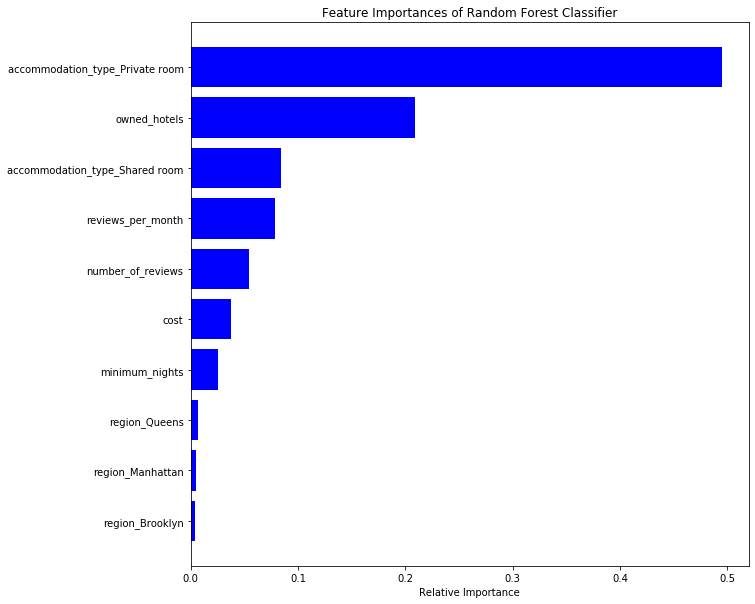

In \[130\]:

    corr_df_viz = corr_df
    corr_df_viz['feature'] = corr_df_viz.index

    plt.figure(figsize=(10,6))
    # make barplot
    sns.barplot(x='feature',
                y="yearly_availability", 
                data=corr_df_viz, 
                order=corr_df_viz.sort_values('yearly_availability', ascending = False).feature)
    # set labels
    plt.xlabel("Feature", size=15)
    plt.ylabel("Correlation between Yearly Availability", size=15)
    plt.title("Top 20 Features", size=18)
    plt.tight_layout()
    plt.xticks(rotation=80)

Out\[130\]:

    (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
     <a list of 12 Text xticklabel objects>)

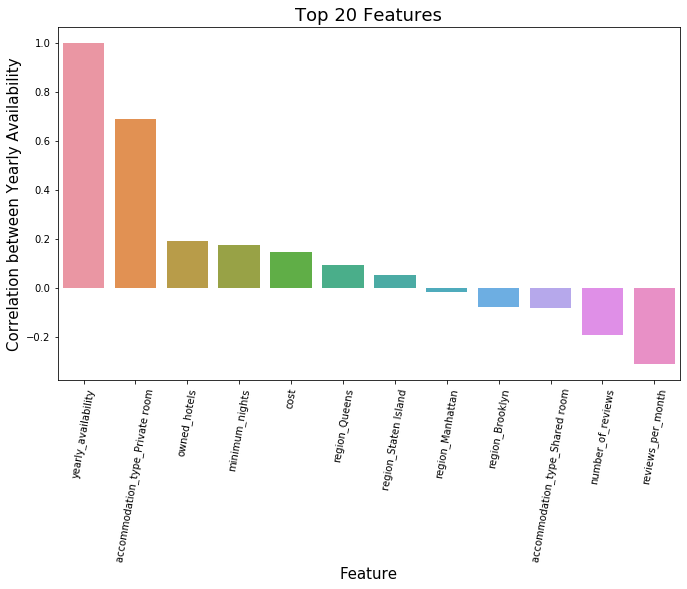

In \[ \]:

     

> #### Task:<a href="#Task:" class="anchor-link">¶</a>
>
> -   **Submit the predictions on the test dataset using your optimized
>     model**  
>     For each record in the test set (`test.csv`), predict the value of
>     the `yearly_availability` variable. Submit a CSV file with a
>     header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:

-   **id**
-   **yearly_availability**

In \[127\]:

    # Combining prediction results to IDs.
    pred_list = list(grid_search_rf.predict(test_data_feature))
    pred_id = list(test_data['id'])
    submission_df = pd.DataFrame(list(zip(pred_id,pred_list )), columns = ['id','yearly_availability'])

In \[128\]:

    submission_df

Out\[128\]:

|     | id    | yearly_availability |
|-----|-------|---------------------|
| 0   | 19215 | 0                   |
| 1   | 36301 | 0                   |
| 2   | 40566 | 1                   |
| 3   | 33694 | 0                   |
| 4   | 28873 | 0                   |
| ... | ...   | ...                 |
| 713 | 26801 | 0                   |
| 714 | 20110 | 0                   |
| 715 | 31383 | 0                   |
| 716 | 47135 | 1                   |
| 717 | 13154 | 1                   |

718 rows × 2 columns

In \[129\]:

    #Submission
    submission_df.to_csv('submissions.csv',index=False)

## Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

#### variable selection:<a href="#variable-selection:" class="anchor-link">¶</a>

-   Dropped the latitude, longitude as they are granular and already
    represented by the region.
-   id, owner_id as they are irrelavent for prediction
-   No significant correlation is observed among the given features

#### Data Pre-Processing :<a href="#Data-Pre-Processing-:" class="anchor-link">¶</a>

-   Filled the missing values in the number_of_reviews with 0's as
    reviews_per_month as 0
-   Performed standard scaler on numerical variables, label encoding on
    categorical variables

#### Model Building:<a href="#Model-Building:" class="anchor-link">¶</a>

-   Used below classifiers to predict yearly_availability to train and
    validate the data

-   Built logisitic regression as base model with 84% accuracy, then
    performed hyper parameter tuning using Kfold, grid search techniques
    on the following classifiers and their accuracies are as shown
    below.

          1. Decision tree classifiers - 92.06
          2. Random forest classifiers  -92.8
          3. XGBoost classifier - 92.4

#### Model Interpretaton:<a href="#Model-Interpretaton:" class="anchor-link">¶</a>

-   From the Random Forest classifiers results seems to be best model
-   As the Random forest model is built using multiple number of
    decision trees, it is not prone to overfitting, outlier, and will be
    more stable.
-   Also, From feature importance, we can infer that
    accomodation_type_private_room, owned_hotels, review_per_month seems
    to be highly effecting the yearly_availability.

In \[ \]:

     

In \[ \]:

     

------------------------------------------------------------------------